In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, BatchNormalization, LeakyReLU, UpSampling2D, Conv2D, Flatten
from tensorflow.keras.optimizers import Adam

# Image dimensions
img_rows, img_cols, channels = 28, 28, 1
img_shape = (img_rows, img_cols, channels)
latent_dim = 100




In [3]:
# Build the generator
generator = Sequential()
generator.add(Dense(128 * 7 * 7, input_dim=latent_dim))
generator.add(Reshape((7, 7, 128)))
generator.add(BatchNormalization())
generator.add(LeakyReLU(alpha=0.2))
generator.add(UpSampling2D(size=(2, 2)))
generator.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
generator.add(BatchNormalization())
generator.add(LeakyReLU(alpha=0.2))
generator.add(UpSampling2D(size=(2, 2)))
generator.add(Conv2D(1, kernel_size=(3, 3), padding='same', activation='tanh'))



In [6]:
# Build the discriminator
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=(3, 3), strides=(2, 2), padding='same', input_shape=img_shape))
discriminator.add(BatchNormalization())
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Conv2D(128, kernel_size=(3, 3), strides=(2, 2), padding='same'))
discriminator.add(BatchNormalization())
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))



In [7]:
# Compile the discriminator
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5), metrics=['accuracy'])



In [8]:
# Build and compile the GAN
discriminator.trainable = False  # Freeze the discriminator during GAN training
gan = Sequential()
gan.add(generator)
gan.add(discriminator)
gan.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5))

# Print the architectures
print("Generator Architecture:")
generator.summary()

print("\nDiscriminator Architecture:")
discriminator.summary()

print("\nGAN Architecture:")
gan.summary()

Generator Architecture:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              633472    
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 batch_normalization (Batch  (None, 7, 7, 128)         512       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 128)       0         
 D)                                                              
                                                                 
 conv2d (Conv2D)             (No

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate and visualize samples
def generate_and_visualize_samples(generator, latent_dim, num_samples=16):
    # Generate random noise in the latent space
    noise = np.random.normal(0, 1, (num_samples, latent_dim))

    # Generate samples using the generator
    generated_samples = generator.predict(noise)

    # Rescale generated samples to the range [0, 1]
    generated_samples = 0.5 * generated_samples + 0.5

    # Plot the generated samples
    fig, axs = plt.subplots(4, 4, figsize=(4, 4), sharey=True, sharex=True)
    cnt = 0
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(generated_samples[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1
    plt.show()




1/1 [==============================] - 0s 315ms/step


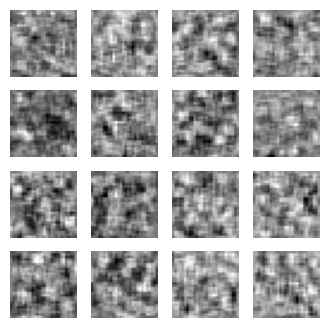

In [10]:
# Generate and visualize samples
generate_and_visualize_samples(generator, latent_dim)